In [1]:
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random
import h5py
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Lambda, Conv2D, MaxPooling2D

%matplotlib inline

Using TensorFlow backend.


In [2]:
lines = []
with open('driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

In [3]:
center_images = []
steering = []
for line in lines:
    image_file = line[0]
    center_images.append(cv.imread(image_file))
    steering.append(float(line[3]))

In [4]:
center_images = np.array(center_images)
steering = np.array(steering)

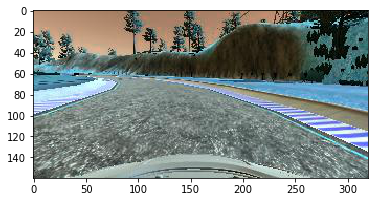

In [5]:
plt.imshow(center_images[0])

In [6]:
center_images[0].shape

(160, 320, 3)

In [7]:
def convert_RGB_to_GRAY(image):
    rgb_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    #rg_img = cv.normalize(rgb_img, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
    return rgb_img[:,:, np.newaxis]

In [8]:
def preprocess_image(x):
    gray_image = lambda t : convert_RGB_to_GRAY(t)
    
    x = np.array(list(map(gray_image, x)))
    x = x.astype(float)/128.0
    return x

In [9]:
#center_images = preprocess_image(center_images)

In [10]:
#Lent architecture
model = Sequential()
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=center_images[0].shape))
model.add(Conv2D(6,(5,5), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (5,5), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(center_images, steering, test_size=0.20)

In [12]:
center_images, steering = shuffle(center_images, steering)

In [13]:
center_images[0].shape

(160, 320, 3)

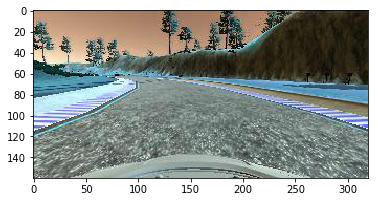

In [ ]:
plt.imshow(center_images[0])

In [ ]:
train_history = model.fit(center_images, steering, validation_split=0.20, shuffle=True, epochs=10)

Train on 7830 samples, validate on 1958 samples
Epoch 1/10
7830/7830 [==============================] - 220s 28ms/step - loss: 15.6573 - val_loss: 0.0592

In [ ]:
train_history.history

In [ ]:
model.save('model_2.h5')

In [ ]:
model.predict(center_images[:2])

In [ ]:
plt.imshow(center_images[0])

In [ ]:
plt.imshow(center_images[1])